In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv("data\cleaned_data_DS_Salary.csv")

In [6]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Same City
0,Data Scientist,53-91,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,0
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,data scientist,na,M,0
2,Data Scientist,80-90,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,data scientist,na,M,1
3,Data Scientist,56-97,3.8,PNNL,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,data scientist,na,na,1
4,Data Scientist,86-143,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,data scientist,na,na,1


### Câu hỏi 1: Nhân sự làm trong ngành data thì cần những kỹ năng nào cho mỗi lĩnh vực ?

**Mục đích**
- Giúp các nhân sự làm trong lĩnh vực data có thể nắm bắt được công nghệ ở các lĩnh vực họ muốn tham gia
- Các doanh nghiệp startup ở các lĩnh vực đó có thể tham khảo để xây dựng đội ngũ chuyên môn phù hợp



**Chọn các cột cần tính toán và xử lý các giá trị chưa phù hợp trên đó**

In [11]:
df_copy = df.copy()

# Chọn ra các cột kỹ năng và thông tin công ty
skill = df_copy.iloc[:, np.arange(21, 37)]
company_info = df_copy[['Company Name', 'Type of ownership', 'Industry', 'Sector']]

# Xử lý các giá trị không có ngữ nghĩa như -1 về Unknown
for i in company_info.columns:
    company_info[i] = company_info[i].apply(lambda x : "Unknown" if x == '-1' else x)
  
# Nối 2 DataFrame tạo 1 DataFrame chung cho công ty 
company = pd.concat([company_info, skill], axis=1)
company

,Company Name,Type of ownership,Industry,Sector,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,Tecolote Research,Company - Private,Aerospace & Defense,Aerospace & Defense,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,University of Maryland Medical System,Other Organization,Health Care Services & Hospitals,Health Care,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,KnowBe4,Company - Private,Security Services,Business Services,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,PNNL,Government,Energy,"Oil, Gas, Energy & Utilities",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Affinity Solutions,Company - Private,Advertising & Marketing,Business Services,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,GSK,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
738,Eventbrite,Company - Public,Internet,Information Technology,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
739,Software Engineering Institute,College / University,Colleges & Universities,Education,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
740,"Numeric, LLC",Company - Private,Staffing & Outsourcing,Business Services,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


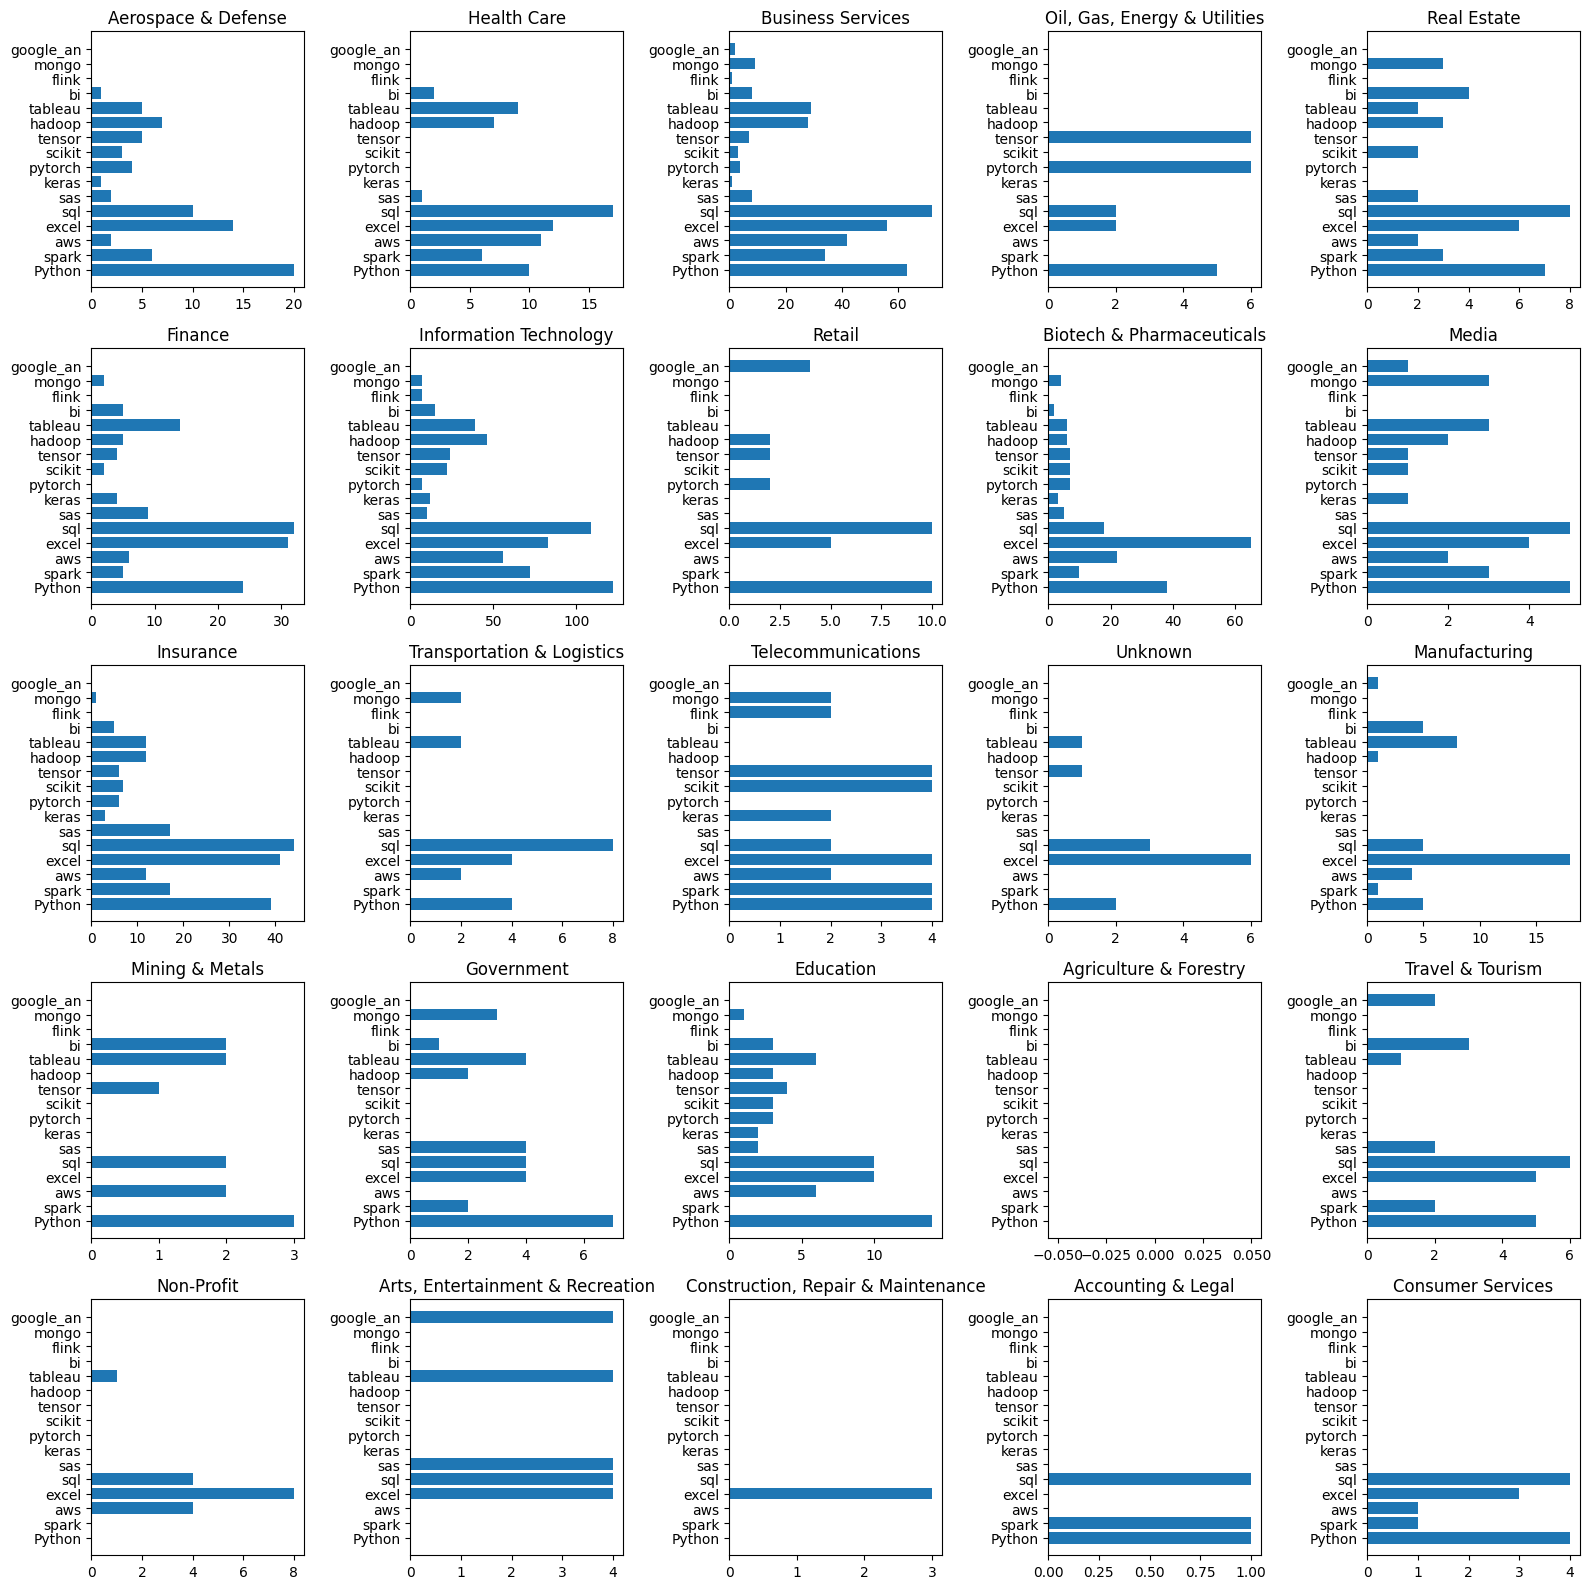

In [12]:
# Lấy ra tên của các lĩnh vực và kỹ năng
labels_sector = company['Sector'].unique()
labels_skill = list(company.columns)[4:]

fig, axes = plt.subplots(5, 5, figsize = (16, 16))

idx1 = 0
idx2 = 0

# Mỗi lĩnh vực tổng hợp ra số lượng kỹ năng cần thiết và biểu diễn biểu đồ

for i in labels_sector:
    total = []
    
    for j in labels_skill:
        total.append(company.loc[company['Sector'] == i][j].sum())
    
    axes[idx1, idx2].barh(labels_skill, total)
    axes[idx1, idx2].set_title(i)

    idx2 = idx2 + 1
    if idx2 == 5:
        idx1 = idx1 + 1
        idx2 = 0

plt.tight_layout()
plt.show()

**Nhận xét**
- Các lĩnh vực cần kỹ năng đa dạng từ 10 kỹ năng trở lên : Aerospace & Defense, Business Services, Real Estate, Finance, Information Technology, Biotech & Pharmaceuticals, Media, Insurance, Telecommunications, Education
  
- Các lĩnh vực cần từ 10 kỹ năng trở xuống: Health Care, Oil, Gas, Energy & Utilities, Retail, Transportation & Logistics, Unknown (Lĩnh vực chưa biết do bị thiếu trong quá trình thu thập), Manufacturing, Mining & Metals, Government, Travel & Tourism, Non-Profit, Arts, Entertainment & Recreation, Construction, Repair & Maintenance, Accounting & Legal, Consumer Services
  
- Trong đó chỉ có Agriculture & Forestry là không cần đến các kỹ năng về công nghệ

- Qua đó có thể cho những người cần tìm việc làm nhìn vào lĩnh vực họ quan tâm và trau dồi thêm các kỹ năng cần thiết để tham gia vào công ty thuộc các lĩnh vực đó hoặc có thể cân nhắc với khả năng của mình chỉ có thể đáp ứng nhu cầu ở thị trường nào thì có thể tham gia thị trường thuộc lĩnh vực đó để tìm ra việc làm phù hợp nhu cầu bản thân

### Câu hỏi 2: 